# Quick demo of segmentation

In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 2]

import os
import sys
sys.path.insert(0, './../')

from tsmule.sampling.segment import MatrixProfileSegmentation, SAXSegmentation, WindowSegmentation
from tsmule.xai.viz import visualize_segmentation_mask

In [21]:
url = 'https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1'
df = pd.read_csv(url)

n = 512
ts = df['steam flow'][:n]
ts2 = df['drum pressure'][:n]
mts = np.stack([ts, ts2], axis=1)

## Visualize Time Series

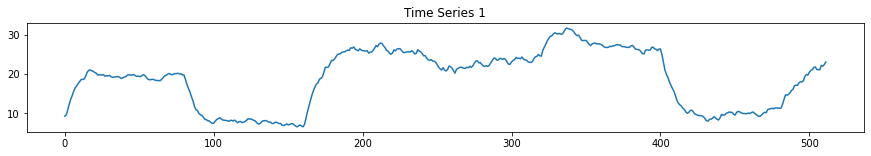

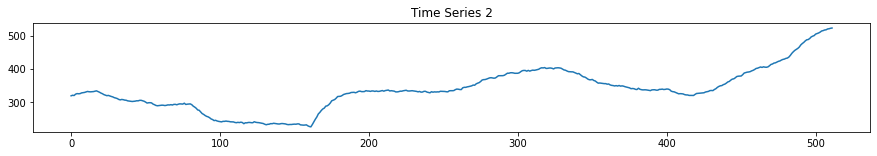

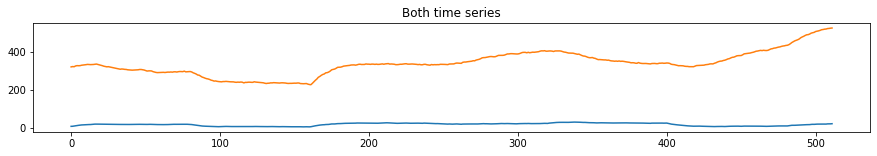

In [22]:
plt.title('Time Series 1')
plt.plot(mts[:, 0])
plt.show()

plt.title('Time Series 2')
plt.plot(mts[:, 1])
plt.show()

plt.title('Both time series')
plt.plot(mts)
plt.show()

## Segmentation with bins of matrix profile distance

In [23]:
mseg = MatrixProfileSegmentation(partitions=15, win_length=32)

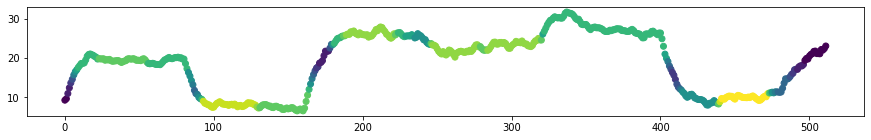

In [24]:
seg_m = mseg.segment(mts[:, 0].reshape(-1, 1), segmentation_method='bins-max')
plt.scatter(range(n), mts[:, 0], c=seg_m)

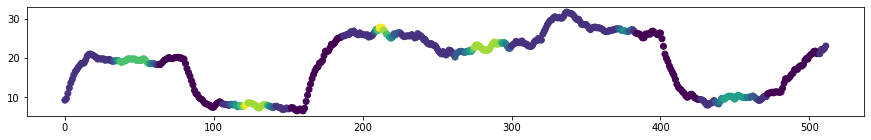

In [25]:
seg_m = mseg.segment(mts[:, 0].reshape(-1, 1), segmentation_method='bins-min')
plt.scatter(range(n), mts[:, 0], c=seg_m)

-

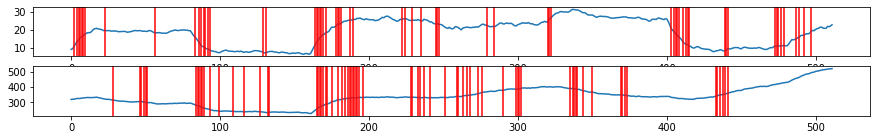

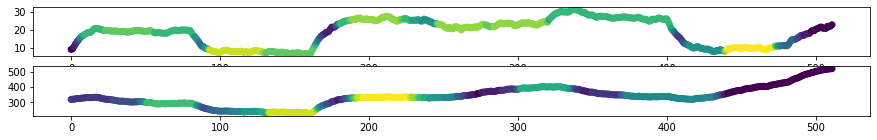

In [26]:
seg_m = mseg.segment(mts, segmentation_method='bins-max')

visualize_segmentation_mask(mts, seg_m)

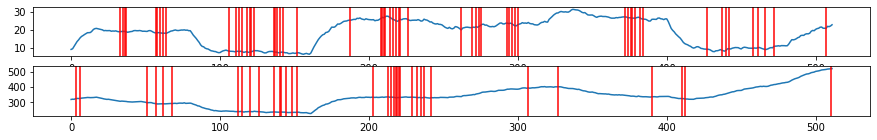

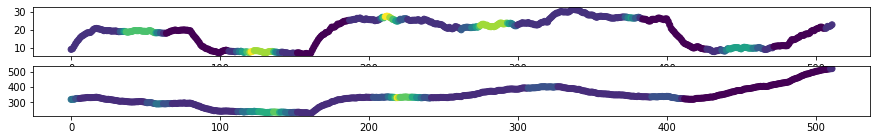

In [27]:
seg_m = mseg.segment(mts, segmentation_method='bins-min')

visualize_segmentation_mask(mts, seg_m)

## Segmentation with slopes of matrix profile distance

In [28]:
mseg = MatrixProfileSegmentation(partitions=15, win_length=32)

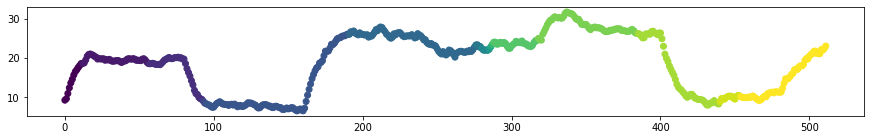

In [29]:
seg_m = mseg.segment(mts[:, 0].reshape(-1, 1), segmentation_method='slopes-sorted')
plt.scatter(range(n), mts[:, 0], c=seg_m)

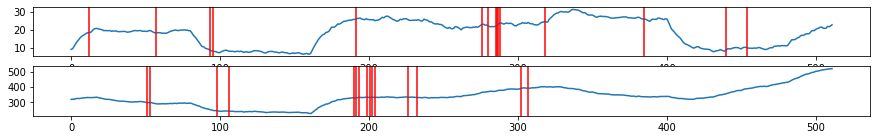

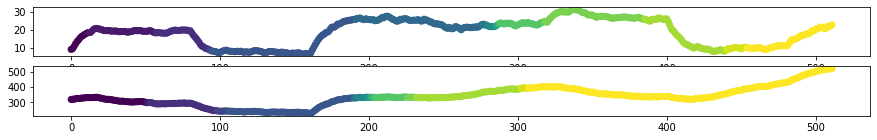

In [30]:
seg_m = mseg.segment(mts, segmentation_method='slopes-sorted')

visualize_segmentation_mask(mts, seg_m)

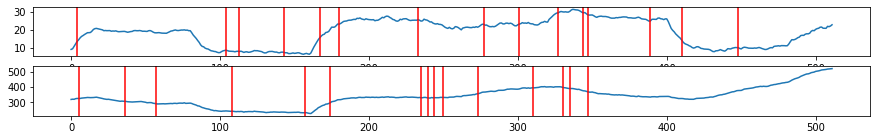

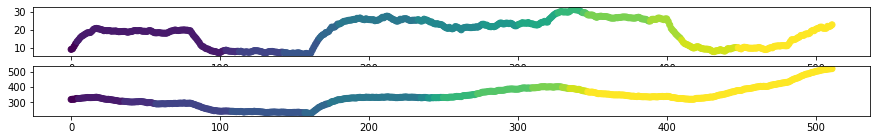

In [31]:
seg_m = mseg.segment(mts, segmentation_method='slopes-not-sorted')

visualize_segmentation_mask(mts, seg_m)

## Segmentation with SAX

In [32]:
sseg = SAXSegmentation(partitions=15, win_length=32)

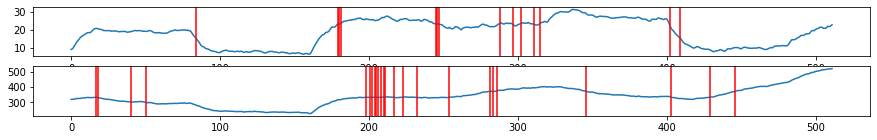

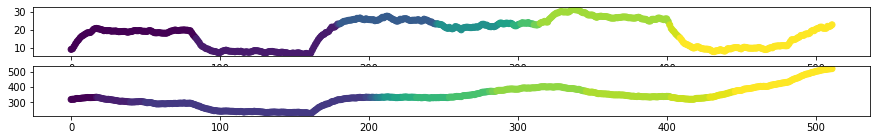

In [33]:
seg_m = sseg.segment(mts)

visualize_segmentation_mask(mts, seg_m)

# Segmentation with uniform and exponential windows

In [34]:
wseg = WindowSegmentation(partitions=15, win_length=32)

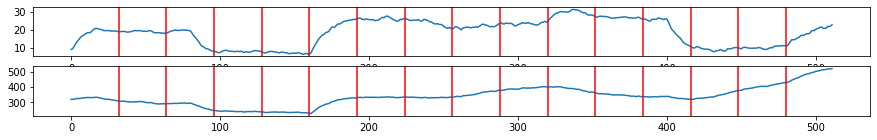

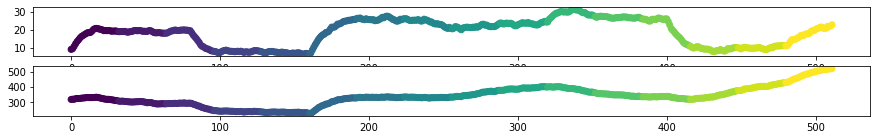

In [35]:
seg_m = wseg.segment(mts)

visualize_segmentation_mask(mts, seg_m)

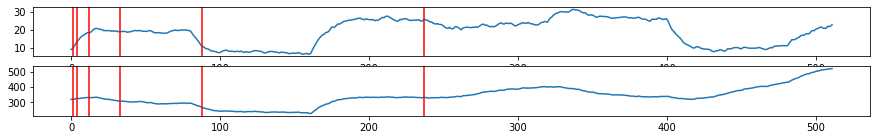

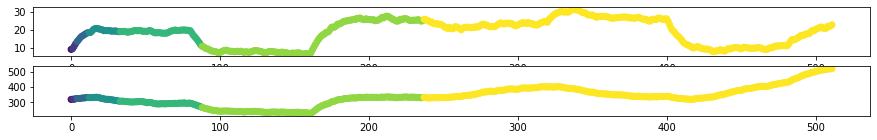

In [36]:
seg_m = wseg.segment(mts, 'exponential')

visualize_segmentation_mask(mts, seg_m)

# Single image

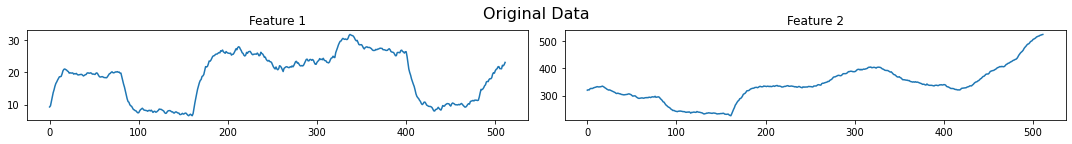

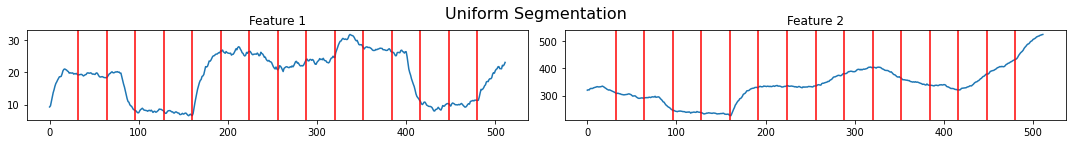

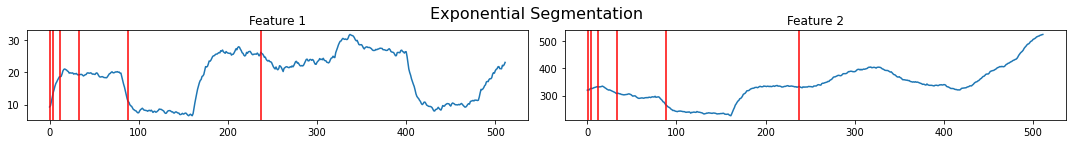

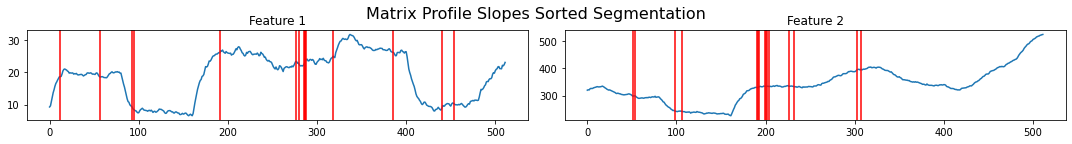

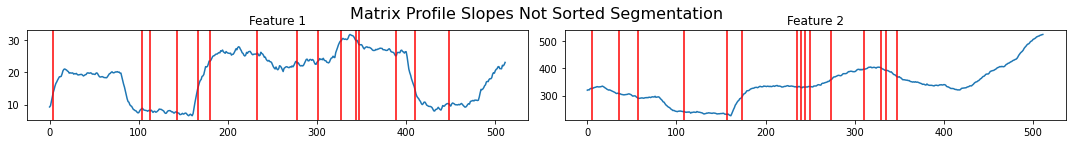

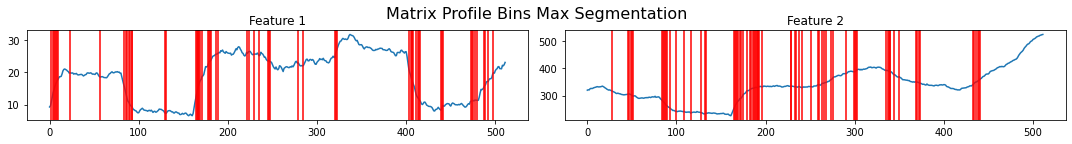

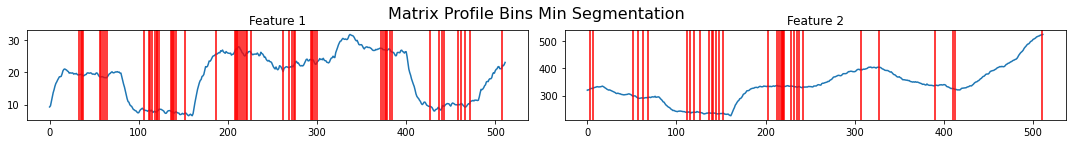

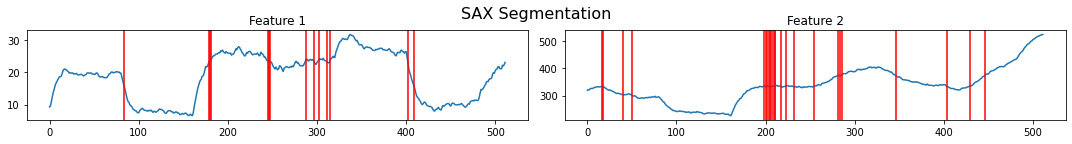

In [38]:
mseg = MatrixProfileSegmentation(partitions=15, win_length=32)
seg_bins_max = mseg.segment(mts, segmentation_method='bins-max')
seg_bins_min = mseg.segment(mts, segmentation_method='bins-min')

mseg = MatrixProfileSegmentation(partitions=15, win_length=32)
seg_slopes_sorted = mseg.segment(mts, segmentation_method='slopes-sorted')
seg_slopes_not_sorted = mseg.segment(mts, segmentation_method='slopes-not-sorted')

sseg = SAXSegmentation(partitions=15, win_length=32)
seg_sax = sseg.segment(mts)

wseg = WindowSegmentation(partitions=15, win_length=32)
seg_uniform = wseg.segment(mts)
seg_exponential = wseg.segment(mts, 'exponential')

n_steps, n_features = mts.shape

fig, ax = plt.subplots(1, 2)

ax[0].plot(mts[:, 0])
ax[0].set_title('Feature 1')
ax[1].plot(mts[:, 1])
ax[1].set_title('Feature 2')

fig.tight_layout()
fig.suptitle('Original Data', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Feature 1')
ax[0].plot(mts[:, 0])
old_value = seg_uniform[0, 0]
for j in range(n_steps):
    value = seg_uniform[j, 0]
    if old_value != value:
        ax[0].axvline(x=j, color='red')
        old_value = value
        
ax[1].set_title('Feature 2')
ax[1].plot(mts[:, 1])
old_value = seg_uniform[0, 1]
for j in range(n_steps):
    value = seg_uniform[j, 1]
    if old_value != value:
        ax[1].axvline(x=j, color='red')
        old_value = value

fig.tight_layout()
fig.suptitle('Uniform Segmentation', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Feature 1')
ax[0].plot(mts[:, 0])
old_value = seg_exponential[0, 0]
for j in range(n_steps):
    value = seg_exponential[j, 0]
    if old_value != value:
        ax[0].axvline(x=j, color='red')
        old_value = value
        
ax[1].set_title('Feature 2')
ax[1].plot(mts[:, 1])
old_value = seg_exponential[0, 1]
for j in range(n_steps):
    value = seg_exponential[j, 1]
    if old_value != value:
        ax[1].axvline(x=j, color='red')
        old_value = value

fig.tight_layout()
fig.suptitle('Exponential Segmentation', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Feature 1')
ax[0].plot(mts[:, 0])
old_value = seg_slopes_sorted[0, 0]
for j in range(n_steps):
    value = seg_slopes_sorted[j, 0]
    if old_value != value:
        ax[0].axvline(x=j, color='red')
        old_value = value
        
ax[1].set_title('Feature 2')
ax[1].plot(mts[:, 1])
old_value = seg_slopes_sorted[0, 1]
for j in range(n_steps):
    value = seg_slopes_sorted[j, 1]
    if old_value != value:
        ax[1].axvline(x=j, color='red')
        old_value = value

fig.tight_layout()
fig.suptitle('Matrix Profile Slopes Sorted Segmentation', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Feature 1')
ax[0].plot(mts[:, 0])
old_value = seg_slopes_not_sorted[0, 0]
for j in range(n_steps):
    value = seg_slopes_not_sorted[j, 0]
    if old_value != value:
        ax[0].axvline(x=j, color='red')
        old_value = value
        
ax[1].set_title('Feature 2')
ax[1].plot(mts[:, 1])
old_value = seg_slopes_not_sorted[0, 1]
for j in range(n_steps):
    value = seg_slopes_not_sorted[j, 1]
    if old_value != value:
        ax[1].axvline(x=j, color='red')
        old_value = value

fig.tight_layout()
fig.suptitle('Matrix Profile Slopes Not Sorted Segmentation', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Feature 1')
ax[0].plot(mts[:, 0])
old_value = seg_bins_max[0, 0]
for j in range(n_steps):
    value = seg_bins_max[j, 0]
    if old_value != value:
        ax[0].axvline(x=j, color='red')
        old_value = value
        
ax[1].set_title('Feature 2')
ax[1].plot(mts[:, 1])
old_value = seg_bins_max[0, 1]
for j in range(n_steps):
    value = seg_bins_max[j, 1]
    if old_value != value:
        ax[1].axvline(x=j, color='red')
        old_value = value

fig.tight_layout()
fig.suptitle('Matrix Profile Bins Max Segmentation', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Feature 1')
ax[0].plot(mts[:, 0])
old_value = seg_bins_min[0, 0]
for j in range(n_steps):
    value = seg_bins_min[j, 0]
    if old_value != value:
        ax[0].axvline(x=j, color='red')
        old_value = value
        
ax[1].set_title('Feature 2')
ax[1].plot(mts[:, 1])
old_value = seg_bins_min[0, 1]
for j in range(n_steps):
    value = seg_bins_min[j, 1]
    if old_value != value:
        ax[1].axvline(x=j, color='red')
        old_value = value

fig.tight_layout()
fig.suptitle('Matrix Profile Bins Min Segmentation', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Feature 1')
ax[0].plot(mts[:, 0])
old_value = seg_sax[0, 0]
for j in range(n_steps):
    value = seg_sax[j, 0]
    if old_value != value:
        ax[0].axvline(x=j, color='red')
        old_value = value
        
ax[1].set_title('Feature 2')
ax[1].plot(mts[:, 1])
old_value = seg_sax[0, 1]
for j in range(n_steps):
    value = seg_sax[j, 1]
    if old_value != value:
        ax[1].axvline(x=j, color='red')
        old_value = value

fig.tight_layout()
fig.suptitle('SAX Segmentation', fontsize=16)
plt.show()